## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import RobustScaler, StandardScaler
from datetime import datetime
import math

from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, learning_curve
from sklearn.metrics import accuracy_score, f1_score, r2_score, precision_score, recall_score, classification_report, confusion_matrix
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


## DATA LOADING AND DESCRIPTION

In [2]:
df = pd.read_csv('/content/Real estate.csv')

In [3]:
df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [4]:
df.tail()

No  X1 transaction date  X2 house age  \
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9

In [5]:
df.drop('No', inplace=True, axis=1)
df.columns = ['transaction date', 'house age',
              'distance to the nearest MRT station',
              'number of convenience stores',
              'latitude', 'longitude', 'house price of unit area']
df.head()

transaction date  house age  distance to the nearest MRT station  \
0          2012.917       32.0                             84.87882   
1          2012.917       19.5                            306.59470   
2          2013.583       13.3                            561.98450   
3          2013.500       13.3                            561.98450   
4          2012.833        5.0                            390.56840   

   number of convenience stores  latitude  longitude  house price of unit area  
0                            10  24.98298  121.54024                      37.9  
1                             9  24.98034  121.53951                      42.2  
2                             5  24.98746  121.54391                      47.3  
3                             5  24.98746  121.54391                      54.8  
4                             5  24.97937  121.54245                      43.1

In [6]:
df.tail()

transaction date  house age  distance to the nearest MRT station  \
409          2013.000       13.7                           4082.01500   
410          2012.667        5.6                             90.45606   
411          2013.250       18.8                            390.96960   
412          2013.000        8.1                            104.81010   
413          2013.500        6.5                             90.45606   

     number of convenience stores  latitude  longitude  \
409                             0  24.94155  121.50381   
410                             9  24.97433  121.54310   
411                             7  24.97923  121.53986   
412                             5  24.96674  121.54067   
413                             9  24.97433  121.54310   

     house price of unit area  
409                      15.4  
410                      50.0  
411                      40.6  
412                      52.5  
413                      63.9

In [7]:
df.shape

(414, 7)

In [8]:
df['transaction date'] = pd.to_numeric(df['transaction date'])
df['house age'] = pd.to_numeric(df['house age'])
df['distance to the nearest MRT station'] = pd.to_numeric(df['distance to the nearest MRT station'])
df['number of convenience stores'] = pd.to_numeric(df['number of convenience stores'])
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])
df['house price of unit area'] = pd.to_numeric(df['house price of unit area'])

print(df.dtypes)
print(df)

transaction date                       float64
house age                              float64
distance to the nearest MRT station    float64
number of convenience stores             int64
latitude                               float64
longitude                              float64
house price of unit area               float64
dtype: object
     transaction date  house age  distance to the nearest MRT station  \
0            2012.917       32.0                             84.87882   
1            2012.917       19.5                            306.59470   
2            2013.583       13.3                            561.98450   
3            2013.500       13.3                            561.98450   
4            2012.833        5.0                            390.56840   
..                ...        ...                                  ...   
409          2013.000       13.7                           4082.01500   
410          2012.667        5.6                             90.45606   


In [9]:
df.describe()

transaction date   house age  distance to the nearest MRT station  \
count        414.000000  414.000000                           414.000000   
mean        2013.148971   17.712560                          1083.885689   
std            0.281967   11.392485                          1262.109595   
min         2012.667000    0.000000                            23.382840   
25%         2012.917000    9.025000                           289.324800   
50%         2013.167000   16.100000                           492.231300   
75%         2013.417000   28.150000                          1454.279000   
max         2013.583000   43.800000                          6488.021000   

       number of convenience stores    latitude   longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.094203   24.969030  121.533361   
std                        2.945562    0.012410    0.015347   
min                        0.000000   24.932070  121.473530   
25%                        1.000000   24.963000  121.528085   
50%                        4.000000   24.971100  121.538630   
75%                        6.000000   24.977455  121.543305   
max                       10.000000   25.014590  121.566270   

       house price of unit area  
count                414.000000  
mean                  37.980193  
std                   13.606488  
min                    7.600000  
25%                   27.700000  
50%                   38.450000  
75%                   46.600000  
max                  117.500000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [11]:
df.isnull().sum()

transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

In [12]:
df.corr()

transaction date  house age  \
transaction date                             1.000000   0.017549   
house age                                    0.017549   1.000000   
distance to the nearest MRT station          0.060880   0.025622   
number of convenience stores                 0.009635   0.049593   
latitude                                     0.035058   0.054420   
longitude                                   -0.041082  -0.048520   
house price of unit area                     0.087491  -0.210567   

                                     distance to the nearest MRT station  \
transaction date                                                0.060880   
house age                                                       0.025622   
distance to the nearest MRT station                             1.000000   
number of convenience stores                                   -0.602519   
latitude                                                       -0.591067   
longitude                                                      -0.806317   
house price of unit area                                       -0.673613   

                                     number of convenience stores  latitude  \
transaction date                                         0.009635  0.035058   
house age                                                0.049593  0.054420   
distance to the nearest MRT station                     -0.602519 -0.591067   
number of convenience stores                             1.000000  0.444143   
latitude                                                 0.444143  1.000000   
longitude                                                0.449099  0.412924   
house price of unit area                                 0.571005  0.546307   

                                     longitude  house price of unit area  
transaction date                     -0.041082                  0.087491  
house age                            -0.048520                 -0.210567  
distance to the nearest MRT station  -0.806317                 -0.673613  
number of convenience stores          0.449099                  0.571005  
latitude                              0.412924                  0.546307  
longitude                             1.000000                  0.523287  
house price of unit area              0.523287                  1.000000

## DATA ANALYSIS AND VISUALIZATION

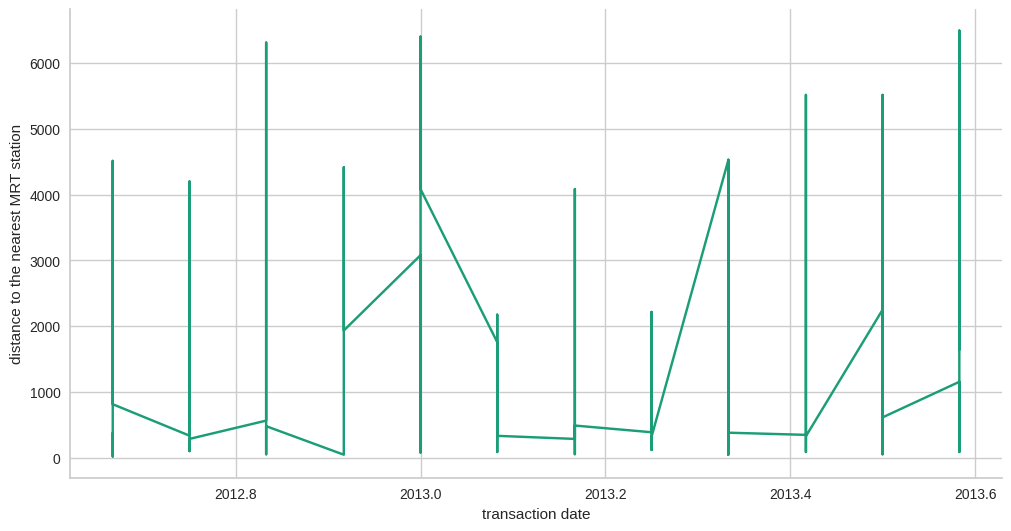

In [13]:
# @title transaction date vs distance to the nearest MRT station

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['transaction date']
  ys = series['distance to the nearest MRT station']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('transaction date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction date')
_ = plt.ylabel('distance to the nearest MRT station')

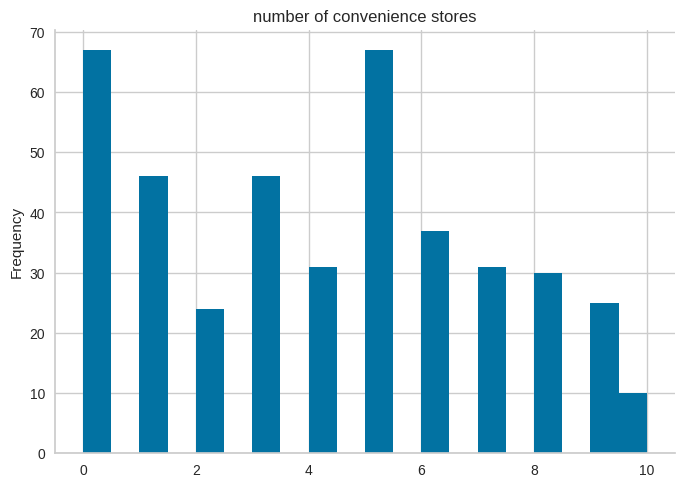

In [14]:
# @title number of convenience stores

from matplotlib import pyplot as plt
df['number of convenience stores'].plot(kind='hist', bins=20, title='number of convenience stores')
plt.gca().spines[['top', 'right',]].set_visible(False)

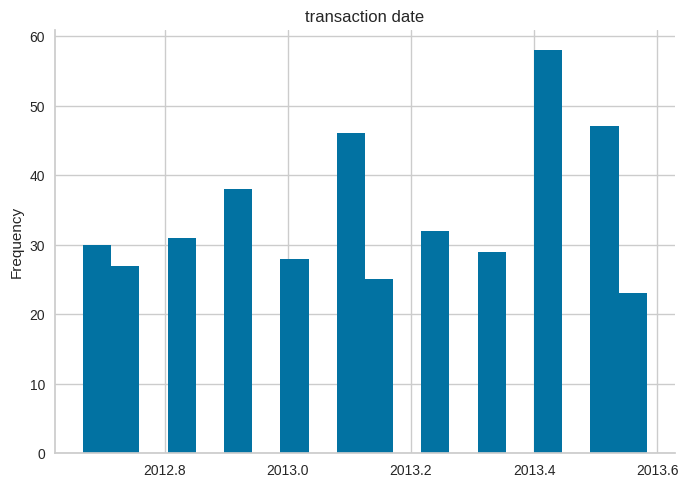

In [15]:
# @title transaction date

from matplotlib import pyplot as plt
df['transaction date'].plot(kind='hist', bins=20, title='transaction date')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


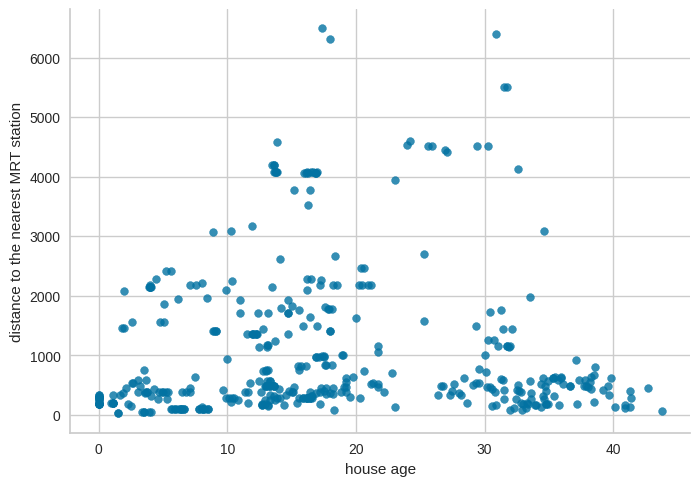

In [7]:
# @title house age vs distance to the nearest MRT station

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='house age', y='distance to the nearest MRT station', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

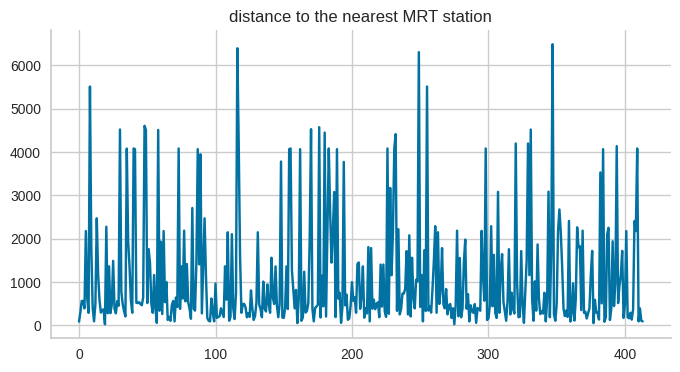

In [6]:
# @title distance to the nearest MRT station

from matplotlib import pyplot as plt
df['distance to the nearest MRT station'].plot(kind='line', figsize=(8, 4), title='distance to the nearest MRT station')
plt.gca().spines[['top', 'right']].set_visible(False)

transaction date
skew -0.15


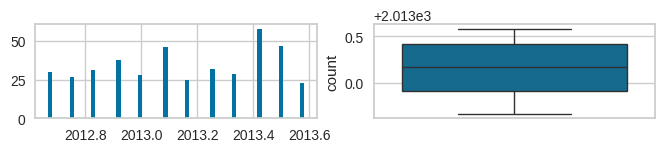

house age
skew 0.38


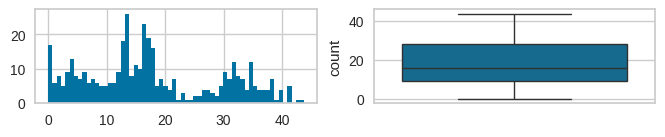

distance to the nearest MRT station
skew 1.89


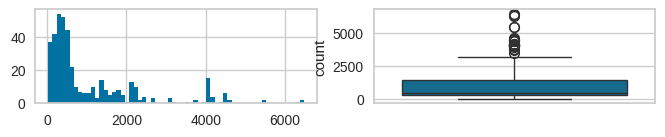

number of convenience stores
skew 0.15


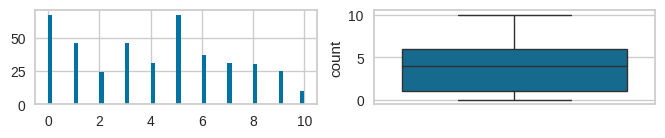

latitude
skew -0.44


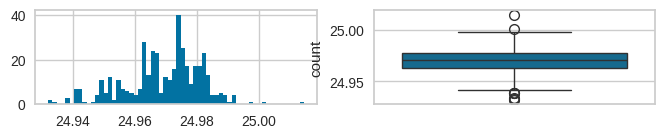

longitude
skew -1.22


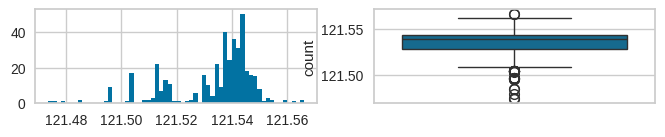

house price of unit area
skew 0.6


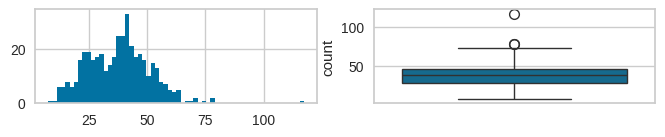

In [23]:
import seaborn as sn
for col in df.columns:
    print(col)
    print('skew',round(df[col].skew(),2))
    plt.figure(figsize=(8,10))
    plt.subplot(7,2,1)
    df[col].hist(bins=60)
    plt.subplot(7,2,2)
    sn.boxplot(df[col])
    plt.ylabel("count")
    plt.show()

<Figure size 1300x1700 with 0 Axes>

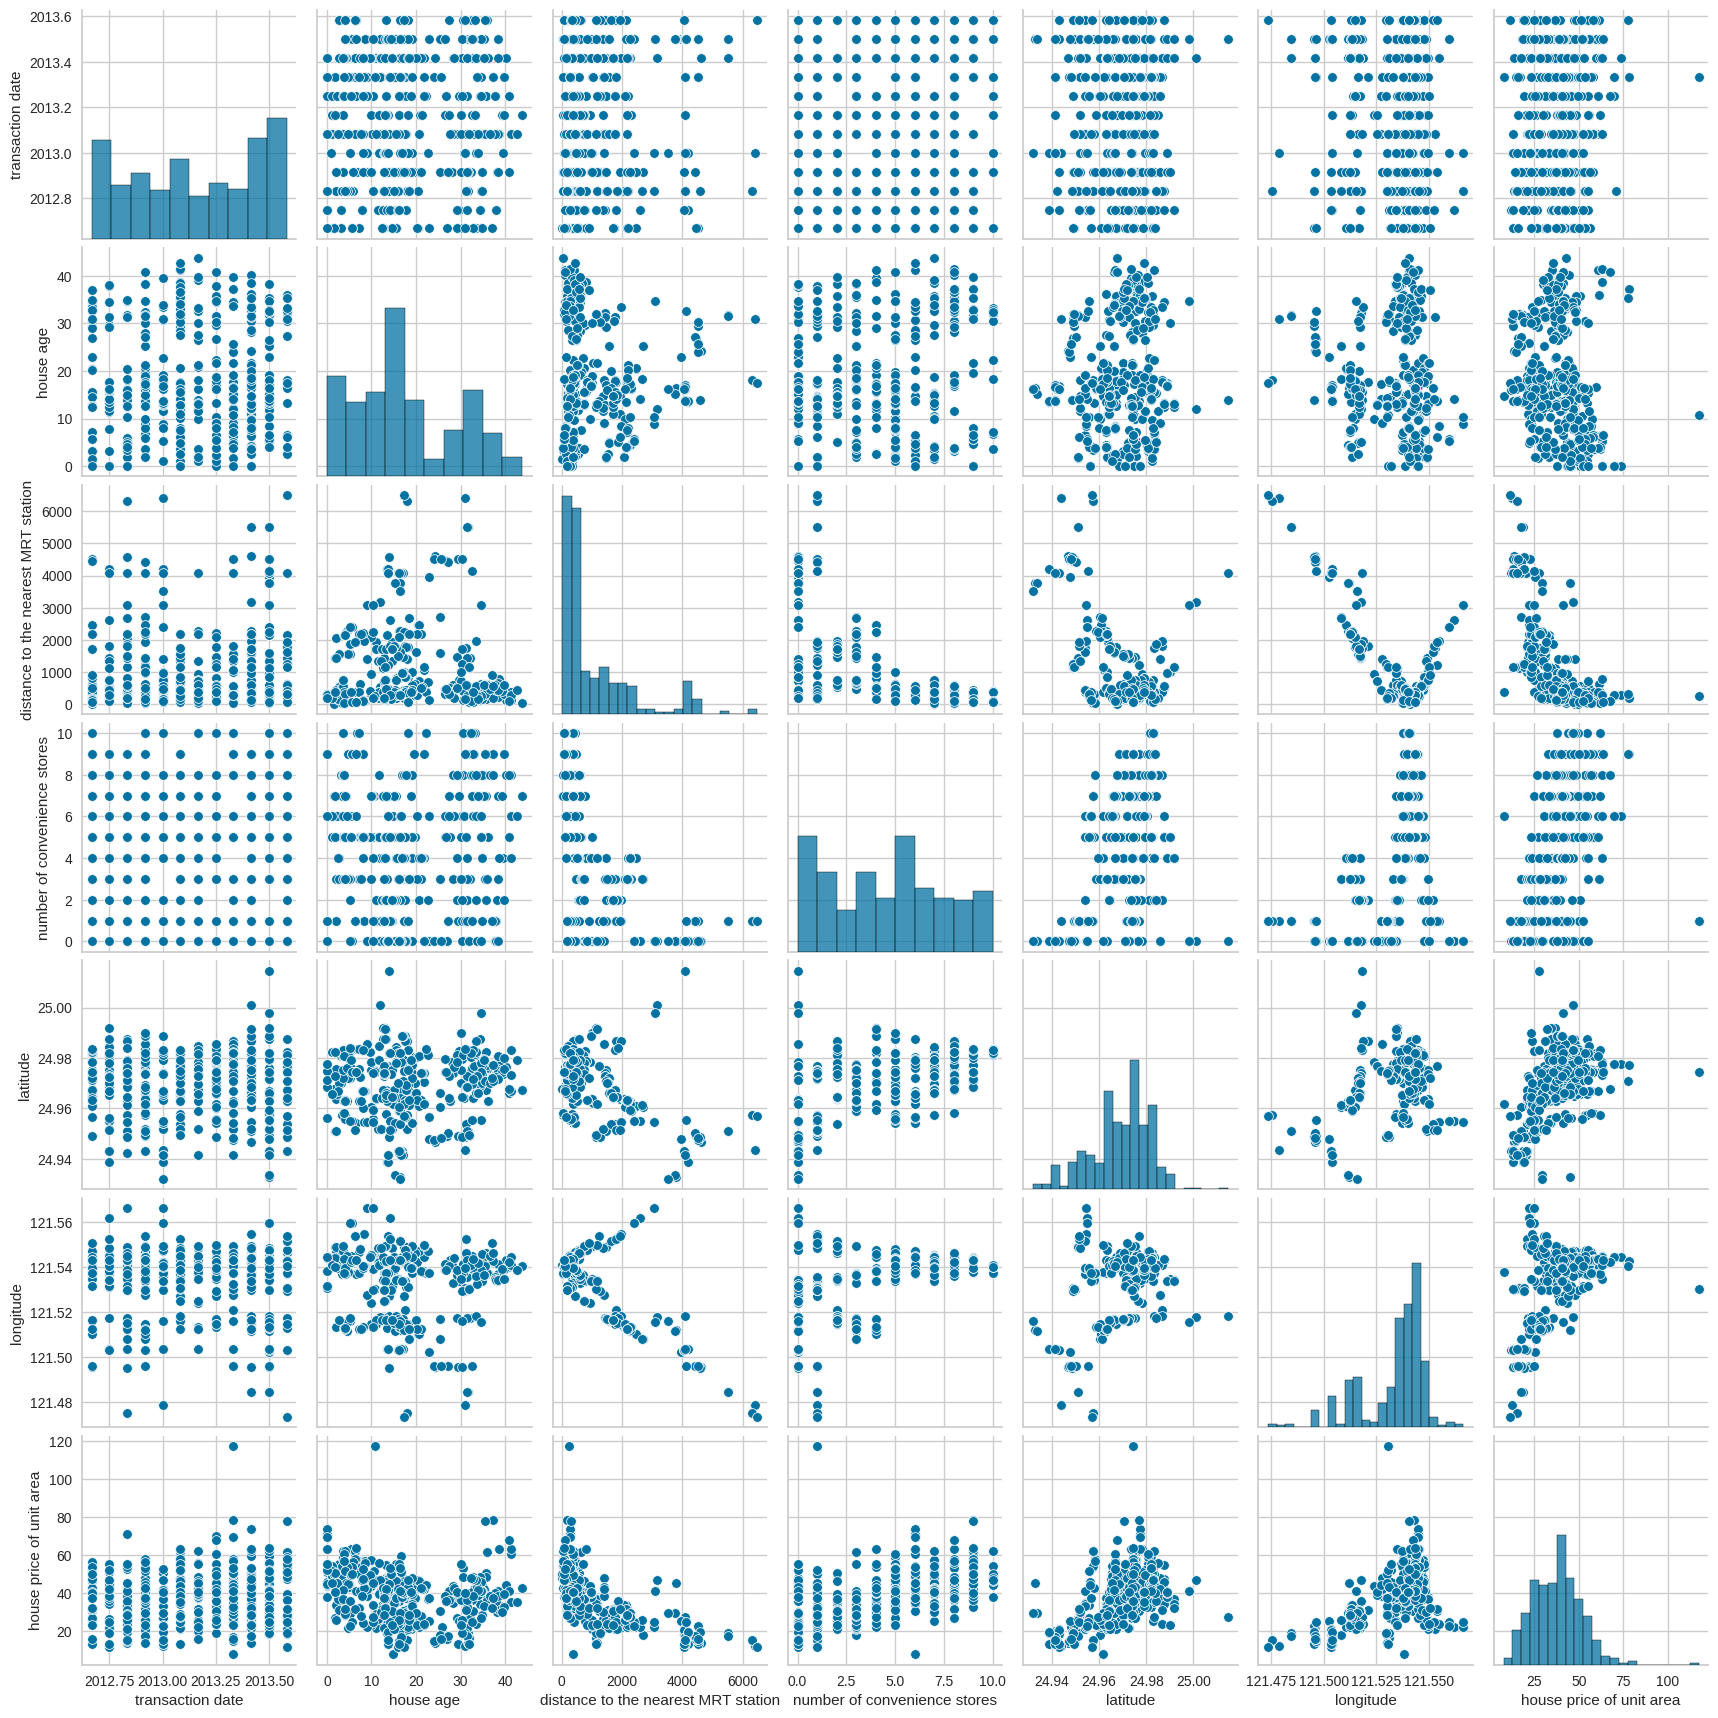

In [24]:
plt.figure(figsize=(13,17))
sn.pairplot(df)

<Axes: >

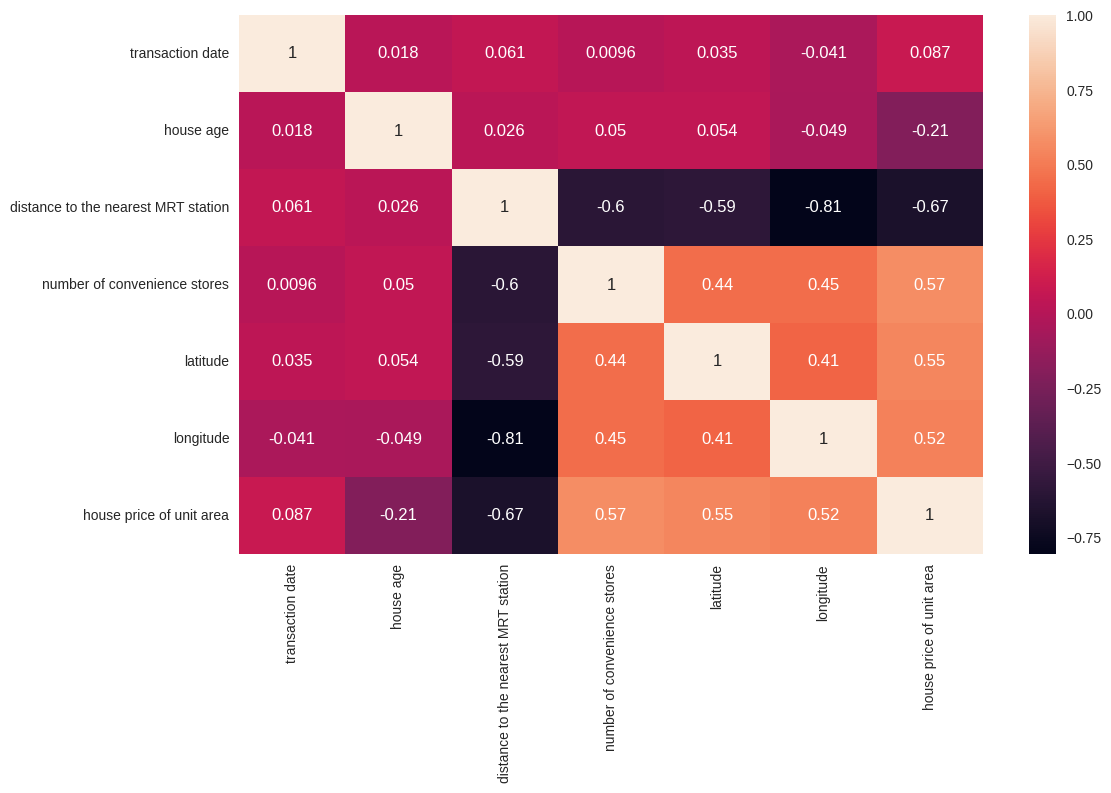

In [25]:
plt.figure(figsize=(12,7))
sn.heatmap(df.corr(),annot=True)

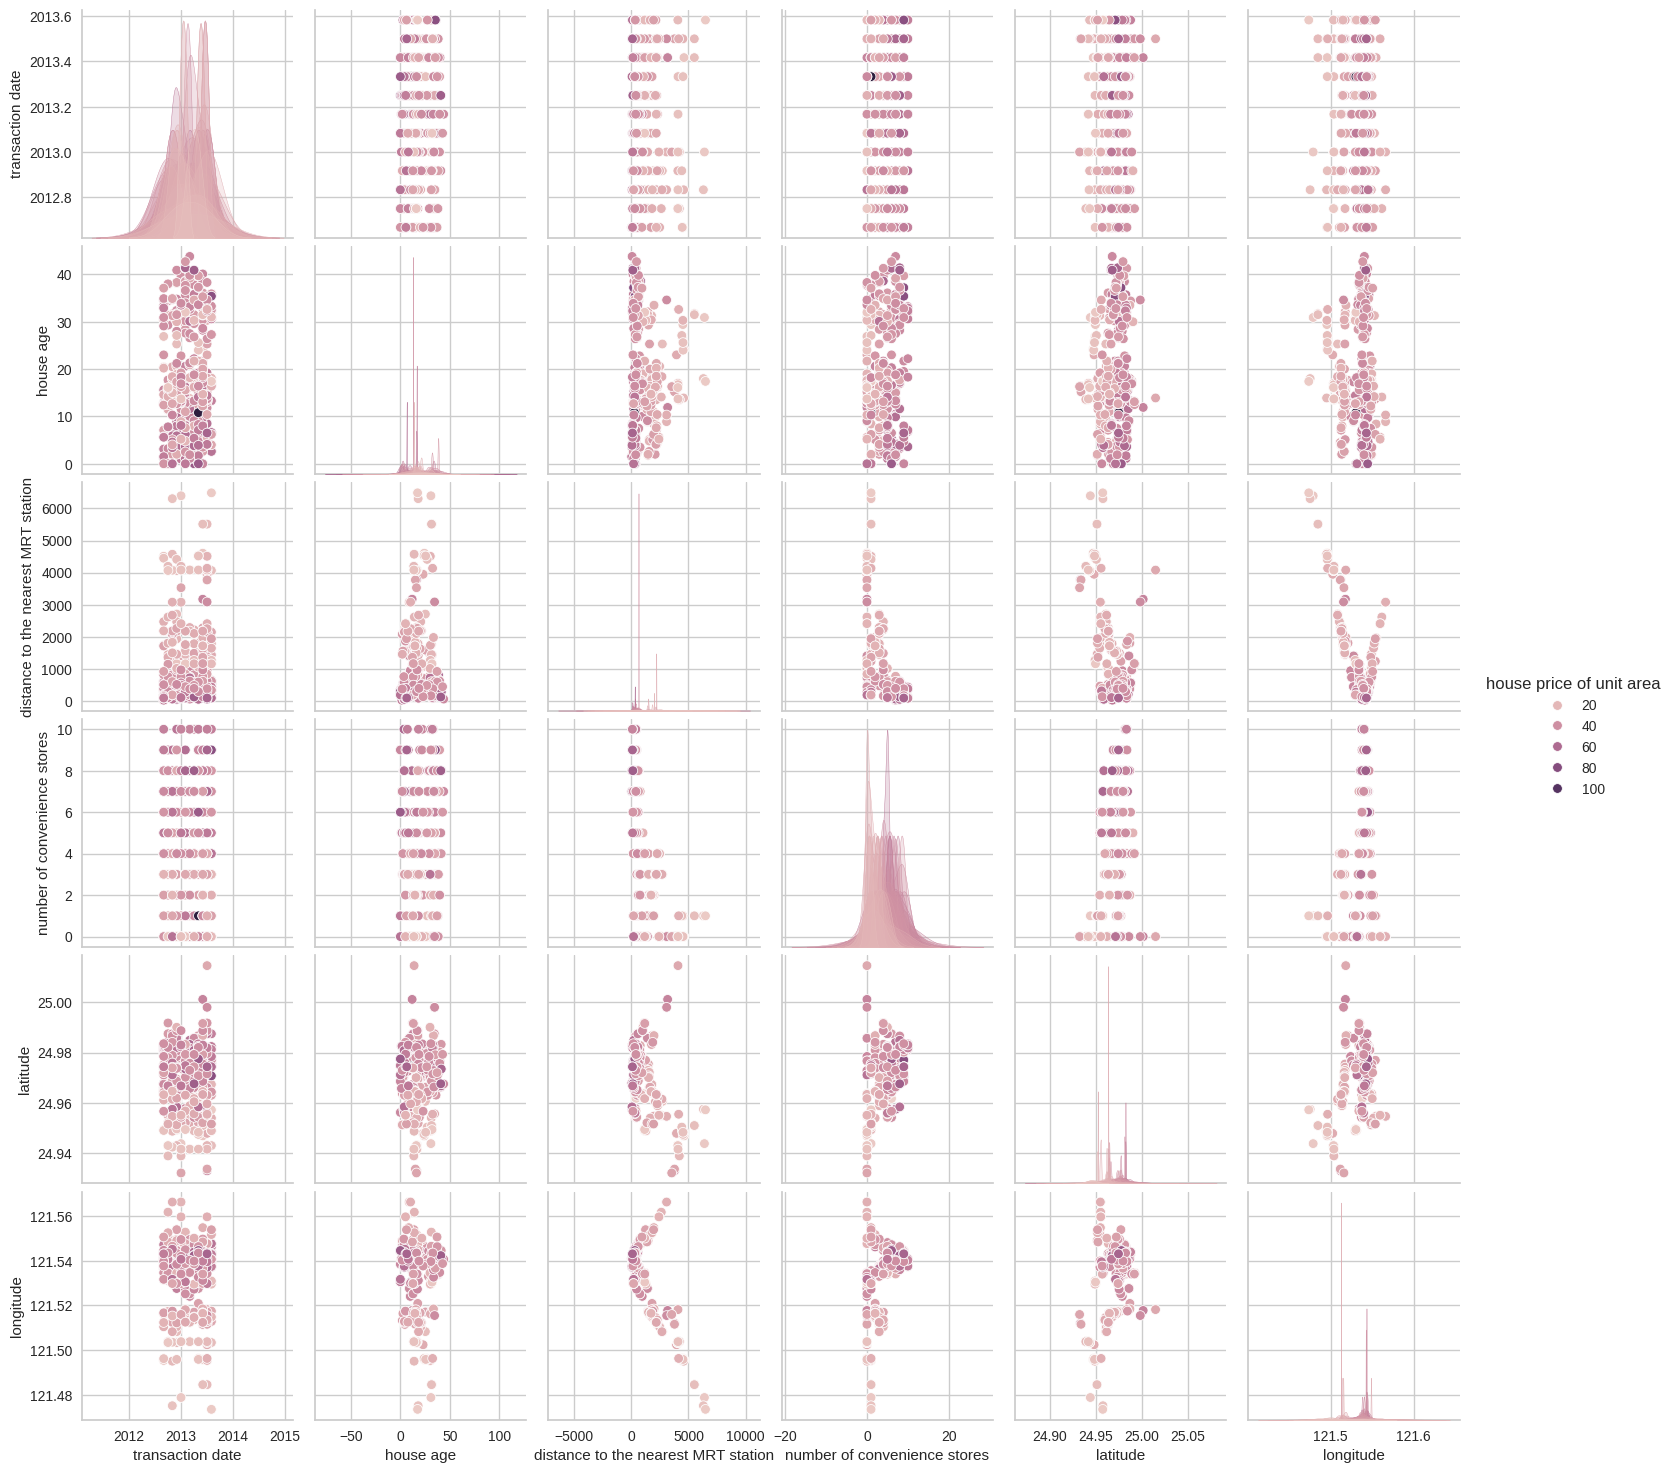

In [26]:
sns.pairplot(df,hue='house price of unit area')

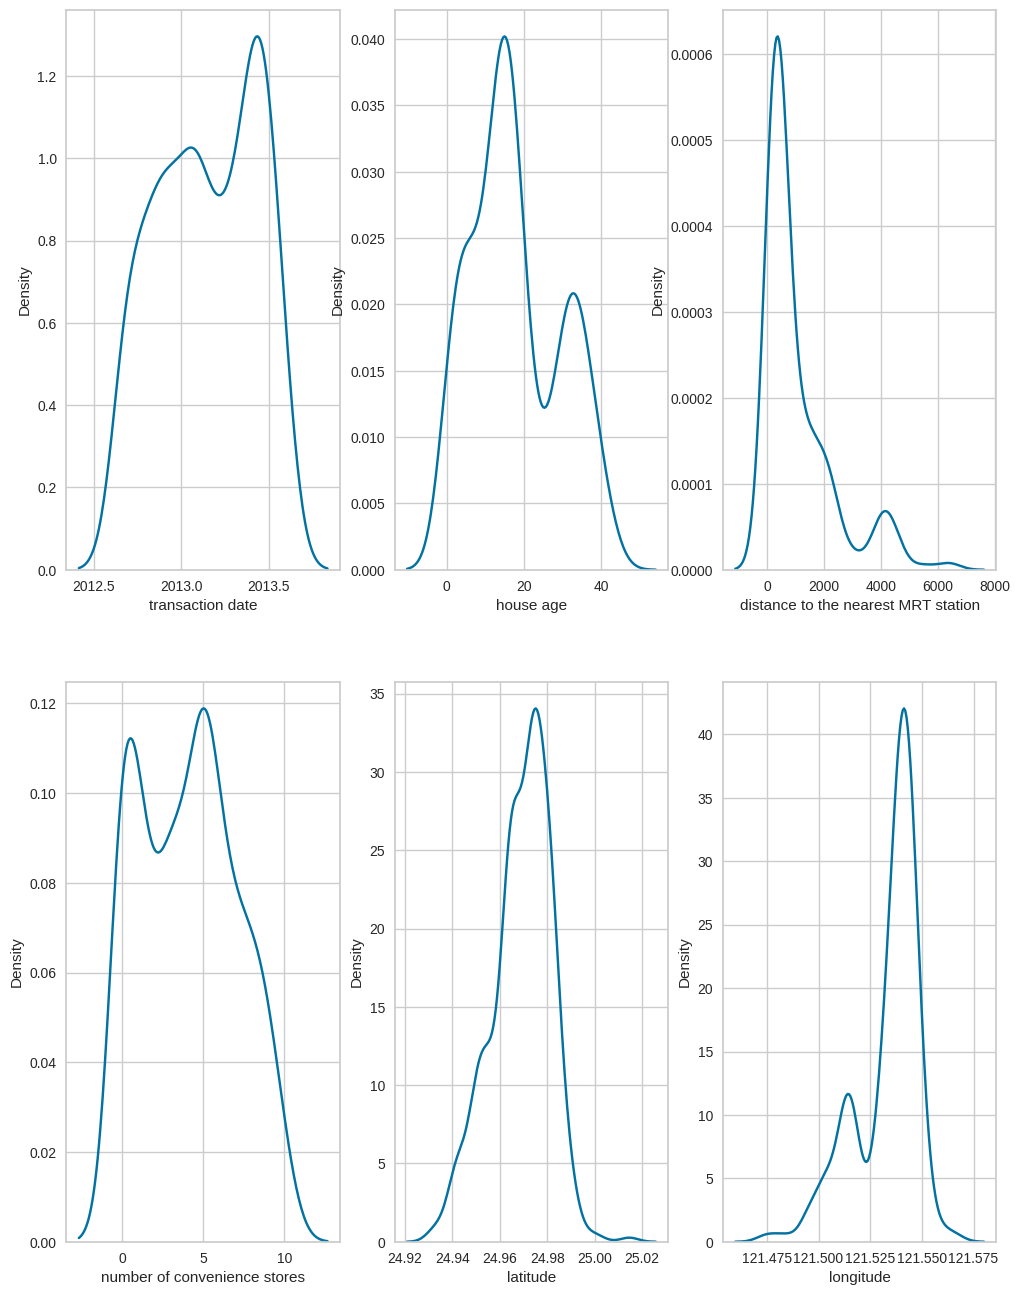

In [27]:
plt.figure(figsize=(12,16))
i=1

for col in df.drop(columns='house price of unit area'):
    plt.subplot(2,3,i)
    sns.kdeplot(df,x=col)
    i+=1

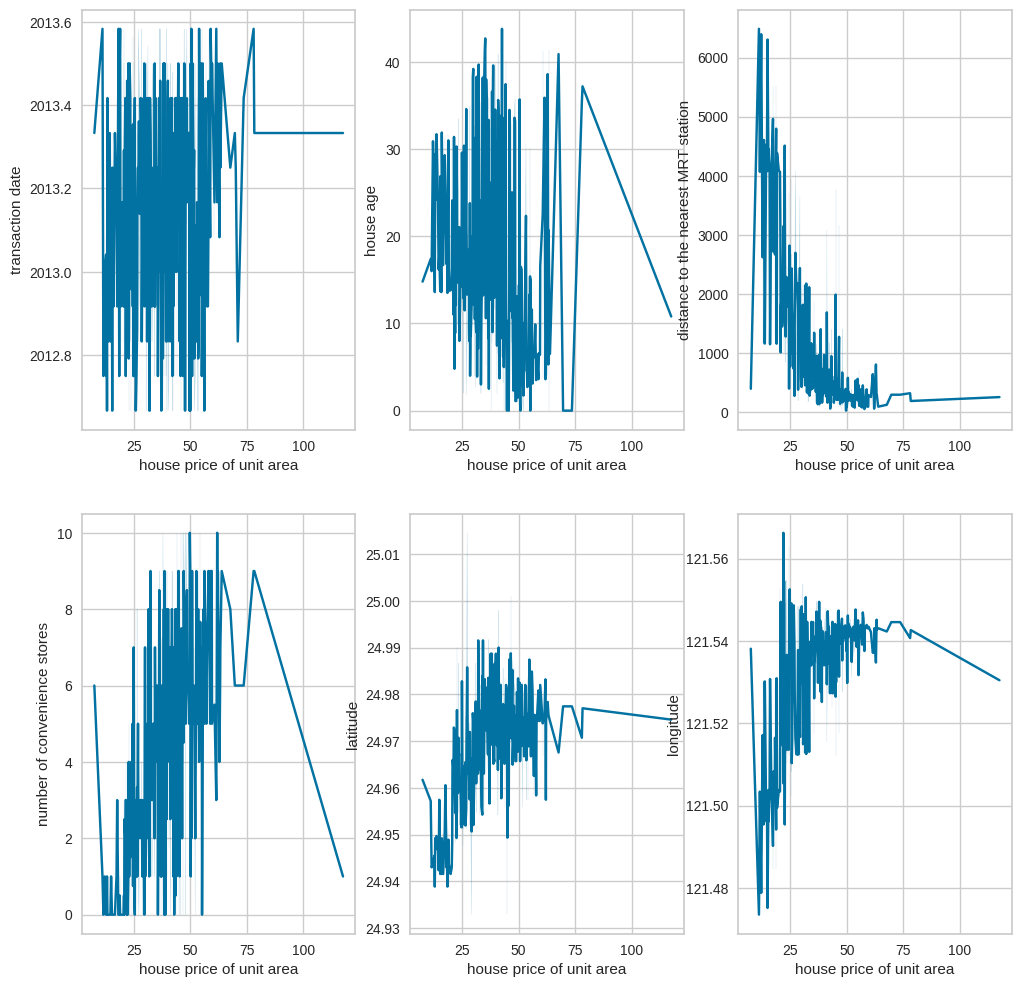

In [28]:
plt.figure(figsize=(12,12))
i=1

for col in df.drop(columns='house price of unit area'):
    plt.subplot(2,3,i)
    sns.lineplot(df,y=col,x='house price of unit area')
    i+=1

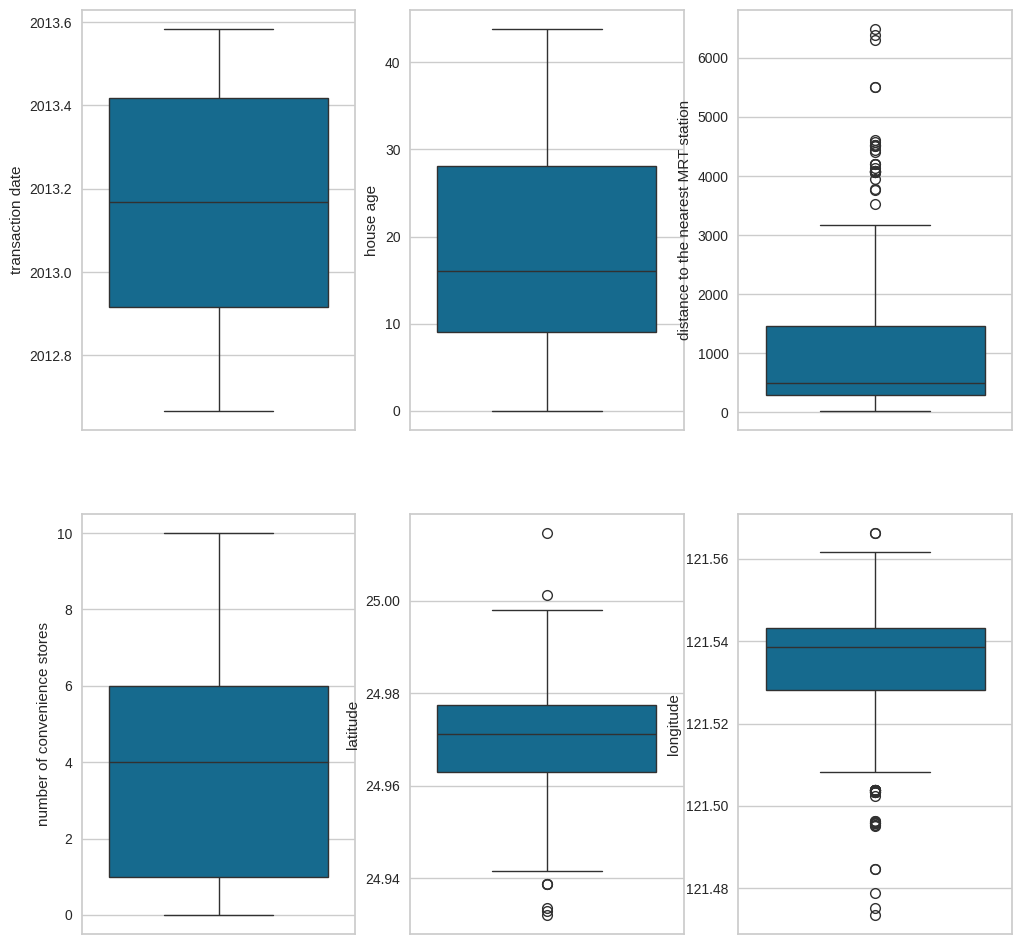

In [29]:
plt.figure(figsize=(12,12))
i=1

for col in df.drop(columns='house price of unit area'):
    plt.subplot(2,3,i)
    sns.boxplot(df,y=col)
    i+=1

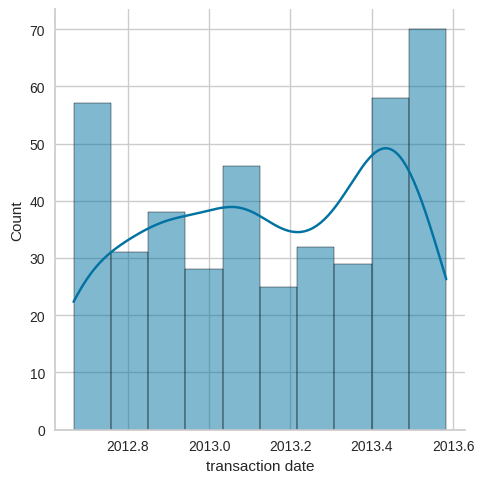

In [30]:
sns.displot(data= df, x='transaction date', kde=True, color='b')

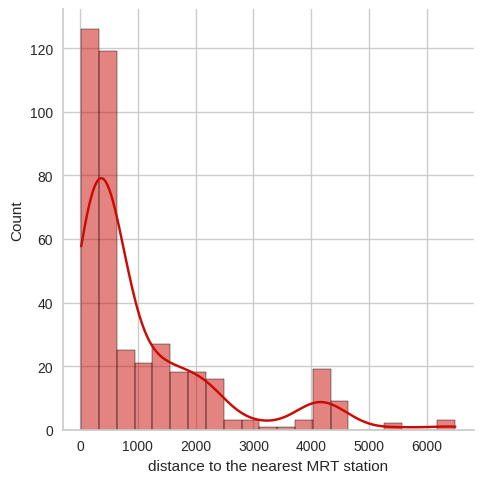

In [31]:
sns.displot(data= df, x='distance to the nearest MRT station', kde=True, color='r')

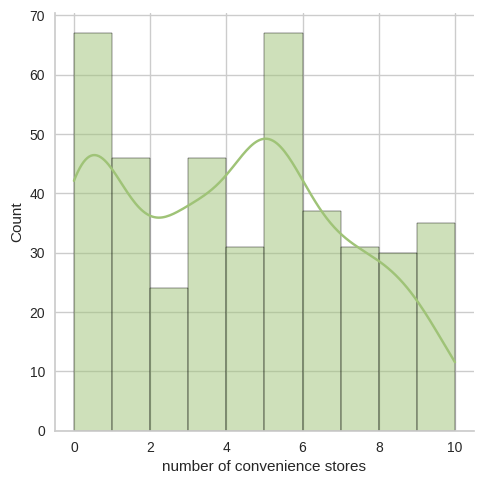

In [32]:
sns.displot(data= df, x='number of convenience stores', kde=True, color='g')

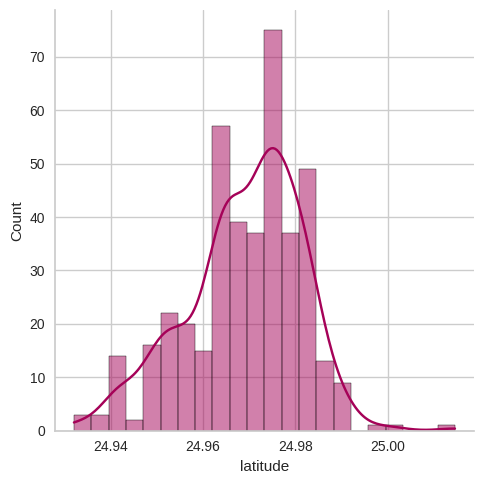

In [33]:
sns.displot(data= df, x='latitude', kde=True, color='m')

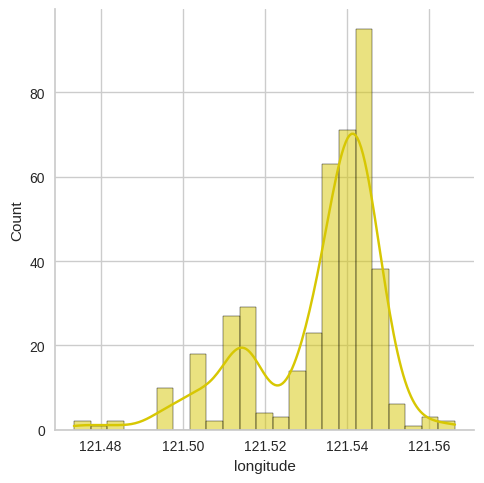

In [34]:
sns.displot(df['longitude'], kde=True, color='y')

## TRAINING TESTING SPLITTING

In [16]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

In [17]:
print("Train set size:",len(train_data))
print("Test set size:",len(test_data))

Train set size: 331
Test set size: 83


In [18]:
train_data.head()

transaction date  house age  distance to the nearest MRT station  \
159          2012.667       15.5                            815.93140   
95           2012.917        8.0                            104.81010   
11           2013.333        6.3                             90.45606   
374          2013.250        5.4                            390.56840   
165          2012.917       13.7                           1236.56400   

     number of convenience stores  latitude  longitude  \
159                             4  24.97886  121.53464   
95                              5  24.96674  121.54067   
11                              9  24.97433  121.54310   
374                             5  24.97937  121.54245   
165                             1  24.97694  121.55391   

     house price of unit area  
159                      37.4  
95                       51.8  
11                       58.1  
374                      49.5  
165                      30.6

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 159 to 37
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     331 non-null    float64
 1   house age                            331 non-null    float64
 2   distance to the nearest MRT station  331 non-null    float64
 3   number of convenience stores         331 non-null    int64  
 4   latitude                             331 non-null    float64
 5   longitude                            331 non-null    float64
 6   house price of unit area             331 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 20.7 KB


In [20]:
train_data.describe()

transaction date   house age  distance to the nearest MRT station  \
count        331.000000  331.000000                           331.000000   
mean        2013.169704   17.813595                          1052.998068   
std            0.281697   11.464981                          1235.130942   
min         2012.667000    0.000000                            23.382840   
25%         2012.917000    9.050000                           289.324800   
50%         2013.167000   16.200000                           492.231300   
75%         2013.417000   29.200000                          1410.633500   
max         2013.583000   42.700000                          6488.021000   

       number of convenience stores    latitude   longitude  \
count                    331.000000  331.000000  331.000000   
mean                       4.205438   24.969453  121.534048   
std                        2.926385    0.012370    0.015145   
min                        0.000000   24.932070  121.473530   
25%                        1.000000   24.963050  121.529915   
50%                        5.000000   24.971100  121.539130   
75%                        6.000000   24.978440  121.543480   
max                       10.000000   25.014590  121.566270   

       house price of unit area  
count                331.000000  
mean                  38.712991  
std                   13.814414  
min                    7.600000  
25%                   28.450000  
50%                   39.300000  
75%                   47.300000  
max                  117.500000

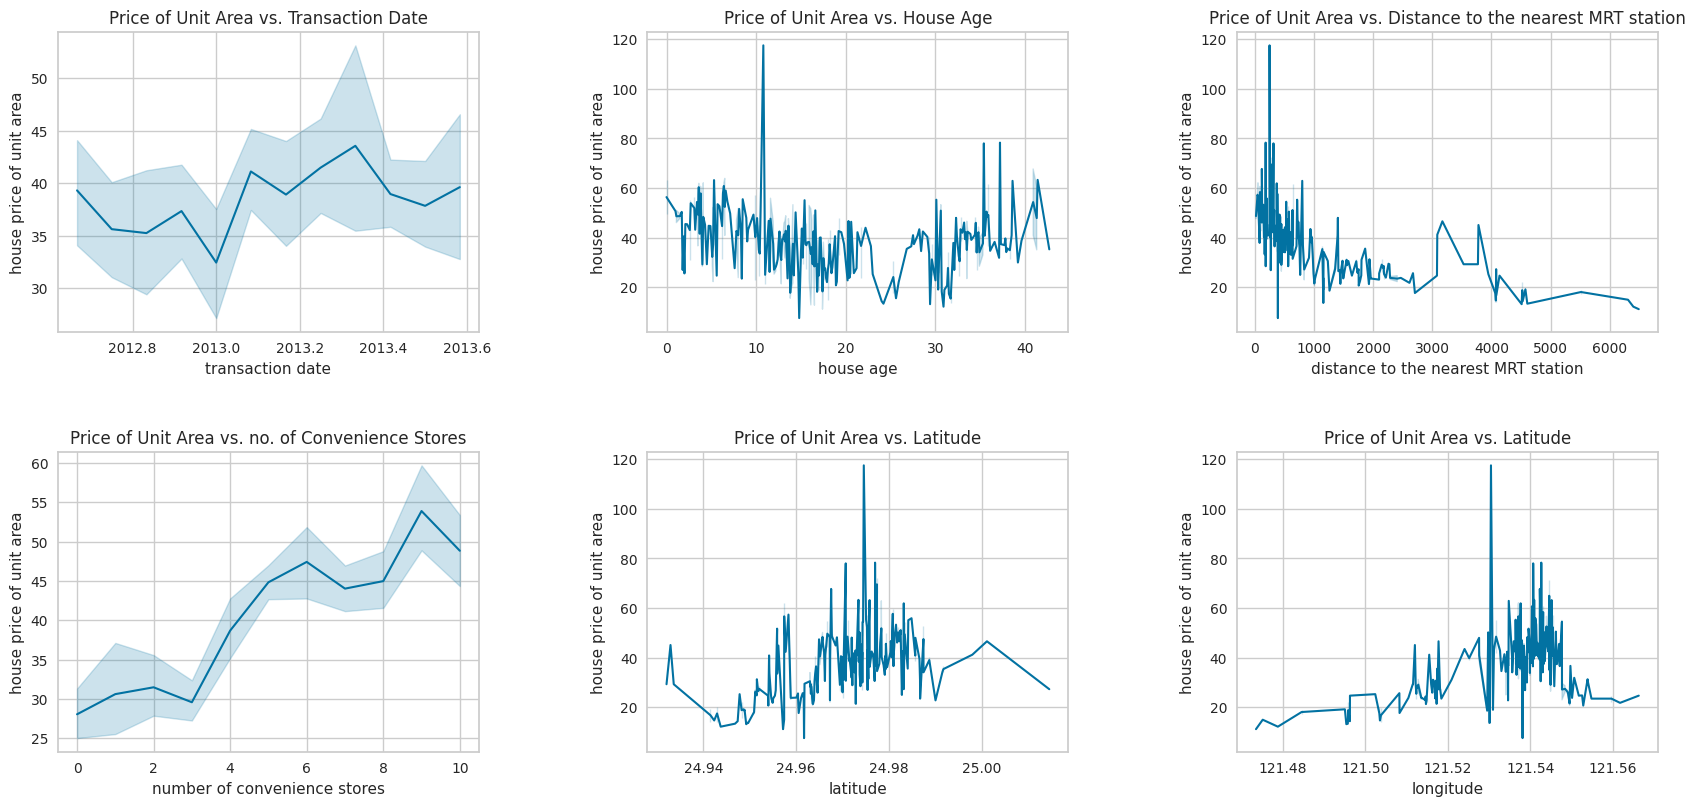

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(20, 9))
ax = ax.flatten()

sns.set()
sns.lineplot(data=train_data, x="transaction date", y="house price of unit area", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. Transaction Date")

sns.lineplot(data=train_data, x="house age", y="house price of unit area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. House Age")

sns.lineplot(data=train_data, x="distance to the nearest MRT station", y="house price of unit area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=train_data, x="number of convenience stores", y="house price of unit area", ax=ax[3])
ax[3].set_title("Price of Unit Area vs. no. of Convenience Stores")

sns.lineplot(data=train_data, x="latitude", y="house price of unit area", ax=ax[4])
ax[4].set_title("Price of Unit Area vs. Latitude")

sns.lineplot(data=train_data, x="longitude", y="house price of unit area", ax=ax[5])
ax[5].set_title("Price of Unit Area vs. Latitude")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show();

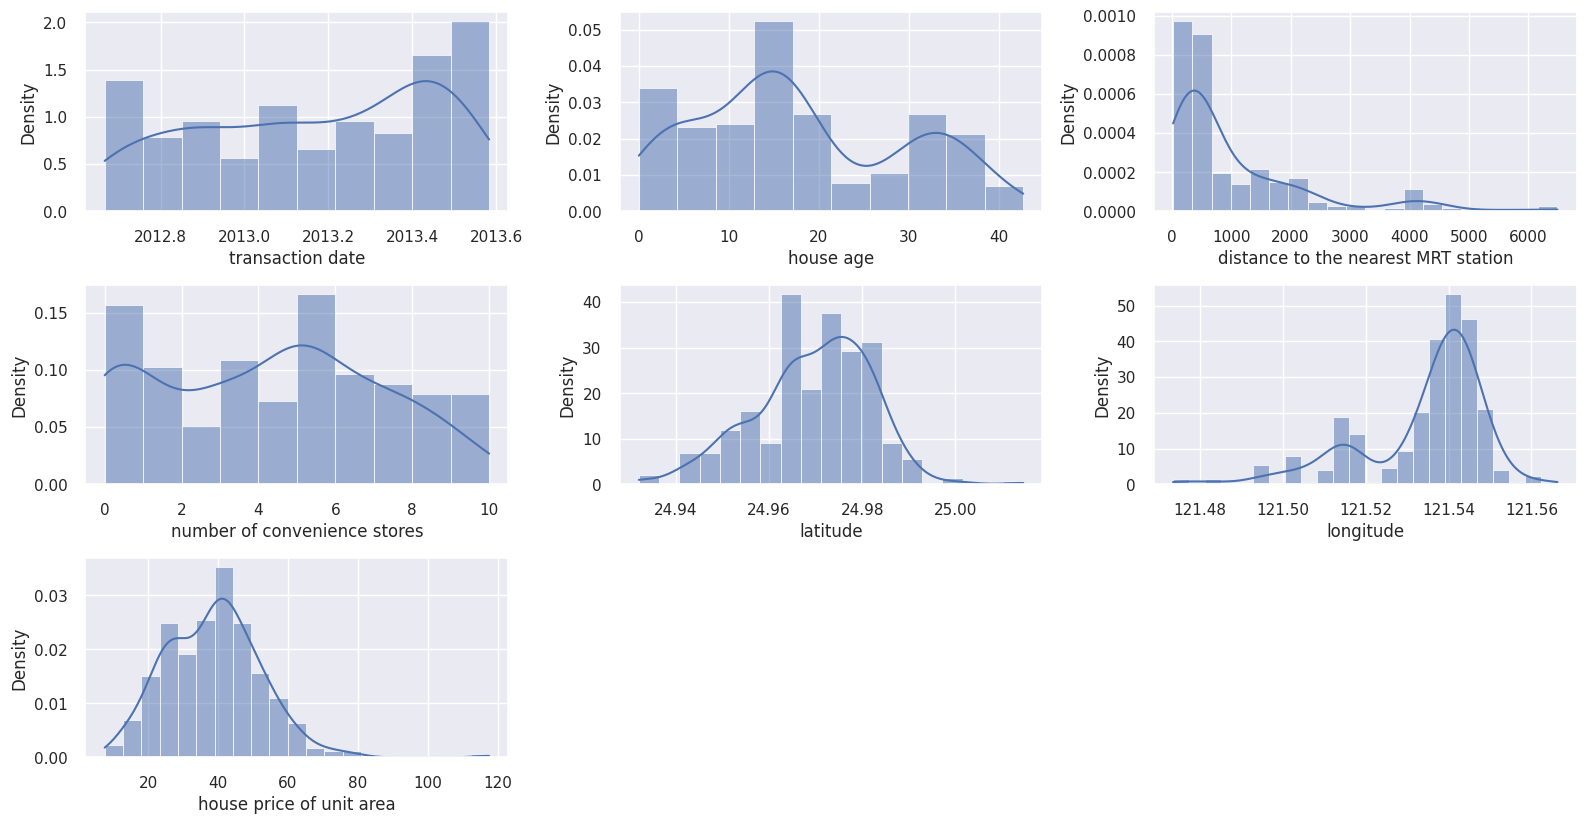

In [22]:
# Histograms
fig = plt.figure(figsize=(16,16))
for index, col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.histplot(train_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
    fig.tight_layout(pad=1.0);

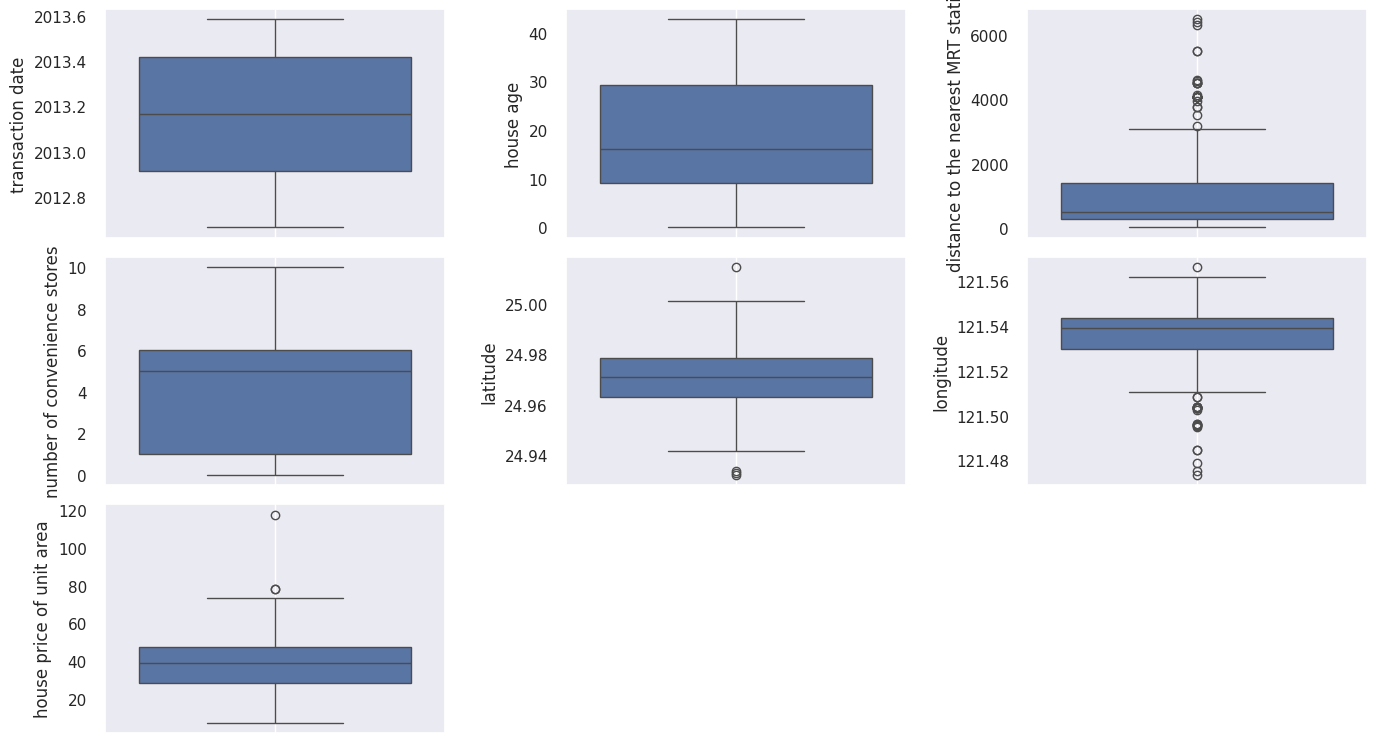

In [23]:
# Boxplots
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=train_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

In [24]:
numeric_train = train_data
correlation = numeric_train.corr()
correlation[['house price of unit area']].sort_values(['house price of unit area'], ascending=False)

house price of unit area
house price of unit area                             1.000000
number of convenience stores                         0.560355
latitude                                             0.506349
longitude                                            0.487869
transaction date                                     0.074428
house age                                           -0.204193
distance to the nearest MRT station                 -0.652540

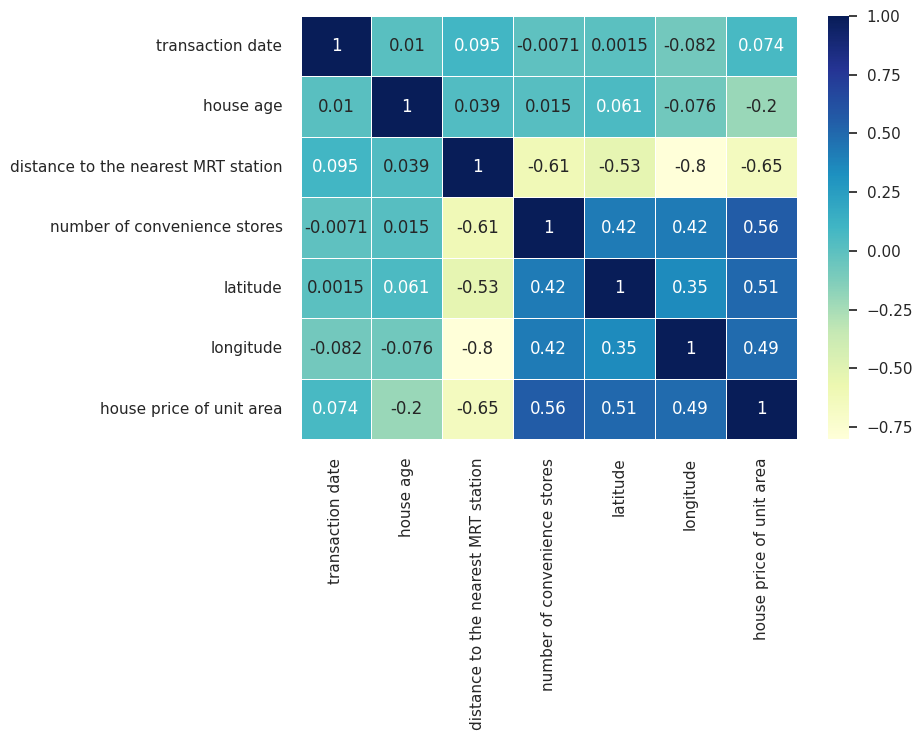

In [25]:
corr = train_data.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot= True, linewidths=.5);

In [40]:
train_data.head()

transaction date  house age  distance to the nearest MRT station  \
159          2012.667       15.5                            815.93140   
95           2012.917        8.0                            104.81010   
11           2013.333        6.3                             90.45606   
374          2013.250        5.4                            390.56840   
165          2012.917       13.7                           1236.56400   

     number of convenience stores  latitude  longitude  \
159                             4  24.97886  121.53464   
95                              5  24.96674  121.54067   
11                              9  24.97433  121.54310   
374                             5  24.97937  121.54245   
165                             1  24.97694  121.55391   

     house price of unit area  
159                      37.4  
95                       51.8  
11                       58.1  
374                      49.5  
165                      30.6

In [63]:
dfs = [train_data, test_data]
data = pd.concat(dfs)

In [66]:
def to_date(data):
    data['date'] = pd.to_datetime(data['transaction date'],format='%Y')

    data['year'] = pd.DatetimeIndex(data['date']).year

    data['month'], data['year1'] = data['transaction date'].apply(lambda x: math.modf(x)).str
    data['month'] = data['month']*12

    data['day'], data['month'] = data['month'].apply(lambda x: math.modf(x)).str

    data['month'] = (data['month'].astype(int))

    data['day'] = (data['day']*30+1).astype(int)

    data = data.drop(['transaction date', 'date', 'year1'], axis=1, inplace=True)

In [58]:
#df['transaction date'] = df['transaction date'].str.extract(r'(\d+\.\d+)')
#df['transaction date'] = pd.to_numeric(df['transaction date'])

In [67]:
import  os
import time
from datetime import datetime
from pytz import timezone
to_date(data)

<ipython-input-66-79602e972e4e>:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['month'], data['year1'] = data['transaction date'].apply(lambda x: math.modf(x)).str
<ipython-input-66-79602e972e4e>:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['day'], data['month'] = data['month'].apply(lambda x: math.modf(x)).str


In [31]:
X=data.drop('house price of unit area',axis=1)
y=data['house price of unit area']

In [32]:
transformer = StandardScaler().fit(X)
X_prep = transformer.transform(X)

In [33]:
#polynomial features
Polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

#Fit and transform
poly_features = Polynomial_converter.fit(X_prep)
poly_features = Polynomial_converter.transform(X_prep)

poly_features.shape

(414, 27)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

## POLYNOMIAL REGRESSION

In [68]:
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

LinearRegression()

In [69]:
pred_train_poly = model_poly.predict(X_train)

r2_train_poly = r2_score(y_train, pred_train_poly)
mse_train_poly = mean_squared_error(y_train, pred_train_poly)

rmse_train_poly = np.sqrt(mse_train_poly)
mae_train_poly = mean_absolute_error(y_train, pred_train_poly)

In [70]:
pred_val_poly = model_poly.predict(X_val)

r2_val_poly = r2_score(y_val, pred_val_poly)
mse_val_poly = mean_squared_error(y_val, pred_val_poly)
rmse_val_poly = np.sqrt(mse_val_poly)
mae_val_poly = mean_absolute_error(y_val, pred_val_poly)

In [71]:
pd.DataFrame({'Validation': [r2_val_poly, mse_val_poly, rmse_val_poly, mae_val_poly],
              'Training': [r2_train_poly, mse_train_poly, rmse_train_poly, mae_train_poly],},
             index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation   Training
R2      0.648926   0.686791
MSE    57.772918  63.570172
RMSE    7.600850   7.973090
MAE     5.926440   5.192505

In [72]:
pred_test_poly = model_poly.predict(X_test)

r2_test_poly = r2_score(y_test, pred_test_poly)
mse_test_poly = mean_squared_error(y_test, pred_test_poly)
rmse_test_poly = np.sqrt(mse_test_poly)
mae_test_poly = mean_absolute_error(y_test, pred_test_poly)

print('R2 Score:', r2_test_poly)
print('MSE:', mse_test_poly)
print('RMSE:', rmse_test_poly)
print('MAE:', mae_test_poly)

R2 Score: 0.7133145088093082
MSE: 42.50270169232838
RMSE: 6.519409612252353
MAE: 4.828368349871804


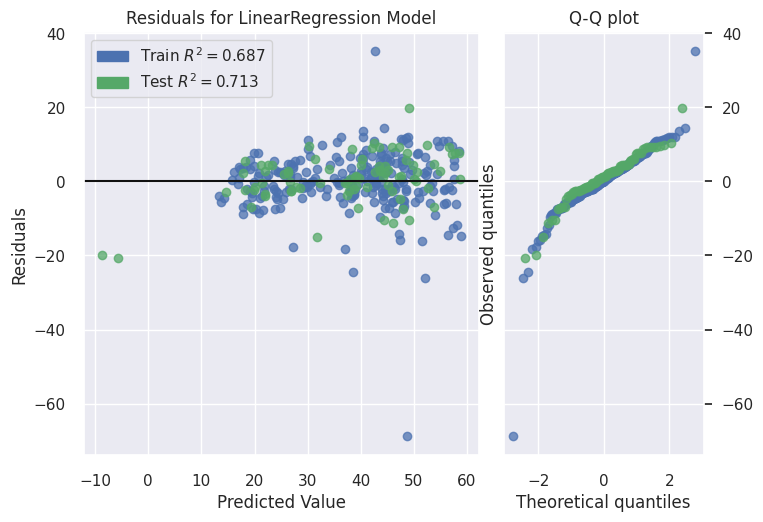

In [73]:
visualizer = ResidualsPlot(model_poly, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [74]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':pred_test_poly, 'Residuals':(y_test-pred_test_poly)}).head(5)

Y_Test     Y_Pred  Residuals
191    37.8  37.341252   0.458748
343    46.6  39.391972   7.208028
275    49.7  57.133414  -7.433414
234    23.9  26.269558  -2.369558
208    26.2  19.293695   6.906305

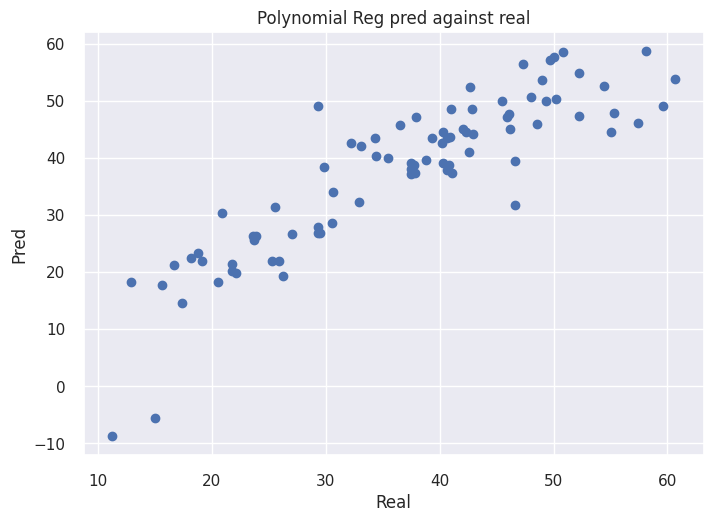

In [75]:
plt.scatter(y_test, pred_test_poly)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('Polynomial Reg pred against real')
plt.show()

## XGBREGRESSOR

In [76]:
model_xgbr = XGBRegressor(objective ='reg:squarederror',
                          n_estimators = 10, seed = 0, max_depth = 3)
model_xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
pred_train_xgbr = model_xgbr.predict(X_train)

r2_train_xgbr = r2_score(y_train, pred_train_xgbr)
mse_train_xgbr = mean_squared_error(y_train, pred_train_xgbr)
rmse_train_xgbr = np.sqrt(mse_train_xgbr)
mae_train_xgbr = mean_absolute_error(y_train, pred_train_xgbr)

In [78]:
pred_val_xgbr = model_xgbr.predict(X_val)

r2_val_xgbr = r2_score(y_val, pred_val_xgbr)
mse_val_xgbr = mean_squared_error(y_val, pred_val_xgbr)
rmse_val_xgbr = np.sqrt(mse_val_xgbr)
mae_val_xgbr = mean_absolute_error(y_val, pred_val_xgbr)

In [79]:
pd.DataFrame({'Validation': [r2_val_xgbr, mse_val_xgbr,
                             rmse_val_xgbr, mae_val_xgbr],
              'Training': [r2_train_xgbr, mse_train_xgbr,
                           rmse_train_xgbr, mae_train_xgbr],},
             index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation   Training
R2      0.730736   0.877661
MSE    44.310198  24.830357
RMSE    6.656591   4.983007
MAE     5.004182   3.550411

In [80]:
pred_test_xgbr = model_xgbr.predict(X_test)

r2_test_xgbr = r2_score(y_test, pred_test_xgbr)
mse_test_xgbr = mean_squared_error(y_test, pred_test_xgbr)
rmse_test_xgbr = np.sqrt(mse_test_xgbr)
mae_test_xgbr = mean_absolute_error(y_test, pred_test_xgbr)

print('R2 Score:', r2_test_xgbr)
print('MSE:', mse_test_xgbr)
print('RMSE:', rmse_test_xgbr)
print('MAE:', mae_test_xgbr)

R2 Score: 0.8122880933713229
MSE: 27.82932313177313
RMSE: 5.275350522171312
MAE: 4.0781630044960115


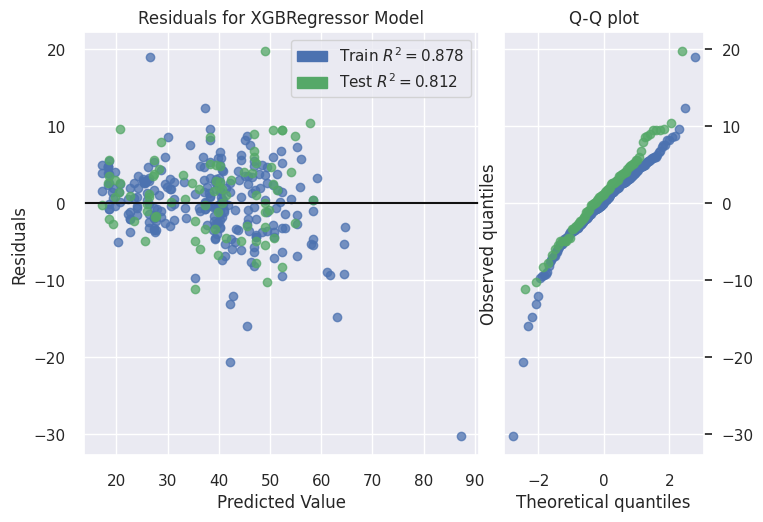

In [81]:
visualizer = ResidualsPlot(model_xgbr, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [82]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':pred_test_poly,
              'Residuals':(y_test-pred_test_xgbr)}).head(5)

Y_Test     Y_Pred  Residuals
191    37.8  37.341252  -2.148494
343    46.6  39.391972   6.682348
275    49.7  57.133414  -1.742822
234    23.9  26.269558  -4.389106
208    26.2  19.293695   0.160966

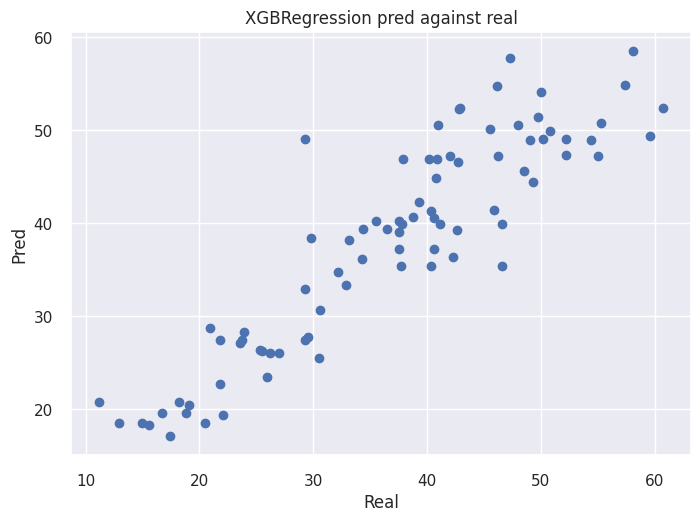

In [83]:
plt.scatter(y_test, pred_test_xgbr)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('XGBRegression pred against real')
plt.show()

## L2 REGULARIZATION - RIDGE REGRESSION

In [84]:
model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [85]:
pred_train_ridge = model_ridge.predict(X_train)
r2_train = r2_score(y_train, pred_train_ridge)
mse_train = mean_squared_error(y_train, pred_train_ridge)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, pred_train_ridge)

In [86]:
pred_val_ridge = model_ridge.predict(X_val)
r2_val = r2_score(y_val, pred_val_ridge)
mse_val = mean_squared_error(y_val, pred_val_ridge)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, pred_val_ridge)

In [87]:
pd.DataFrame({'Validation': [r2_val, mse_val, rmse_val, mae_val],
              'Training': [r2_train, mse_train, rmse_train, mae_train],},
             index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation   Training
R2      0.651268   0.681243
MSE    57.387552  64.696148
RMSE    7.575457   8.043392
MAE     5.919776   5.215908

In [88]:
model_ridge_cv = RidgeCV(alphas=(0.001, 0.01),
                         scoring='neg_mean_absolute_error')

In [89]:
model_ridge_cv.fit(X_train, y_train)
print("alpha:", model_ridge_cv.alpha_)

alpha: 0.01


In [90]:
pred_val_ridge = model_ridge_cv.predict(X_val)
r2_val2 = r2_score(y_val, pred_val_ridge)
mse_val2 = mean_squared_error(y_val, pred_val_ridge)
rmse_val2 = np.sqrt(mse_val)
mae_val2 = mean_absolute_error(y_val, pred_val_ridge)

In [91]:
pd.DataFrame({'Validation 1': [r2_val, mse_val, rmse_val, mae_val],
              'Validation 2': [r2_val2, mse_val2, rmse_val2, mae_val2],
            }, index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation 1  Validation 2
R2        0.651268      0.648889
MSE      57.387552     57.779058
RMSE      7.575457      7.575457
MAE       5.919776      5.926851

In [92]:
pred_test_ridge = model_ridge_cv.predict(X_test)
r2_test_ridge = r2_score(y_test, pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_val)
mae_test_ridge = mean_absolute_error(y_test, pred_test_ridge)

print('R2 Score:', r2_test_ridge)
print('MSE:', mse_test_ridge)
print('RMSE:', rmse_test_ridge)
print('MAE:', mae_test_ridge)

R2 Score: 0.7132530130789245
MSE: 42.51181877276727
RMSE: 7.575457210114056
MAE: 4.828086286760074


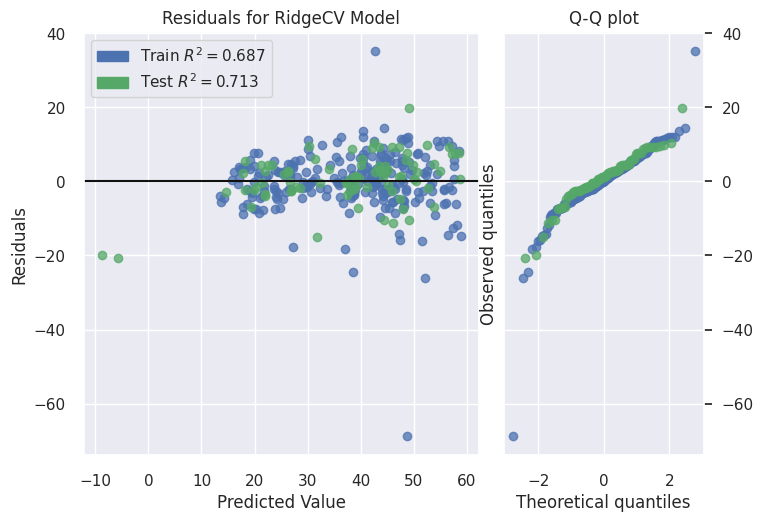

In [93]:
visualizer = ResidualsPlot(model_ridge_cv, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [94]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':pred_test_poly,
              'Residuals':(y_test-pred_test_ridge)}).head(5)

Y_Test     Y_Pred  Residuals
191    37.8  37.341252   0.458087
343    46.6  39.391972   7.204471
275    49.7  57.133414  -7.429826
234    23.9  26.269558  -2.376095
208    26.2  19.293695   6.905541

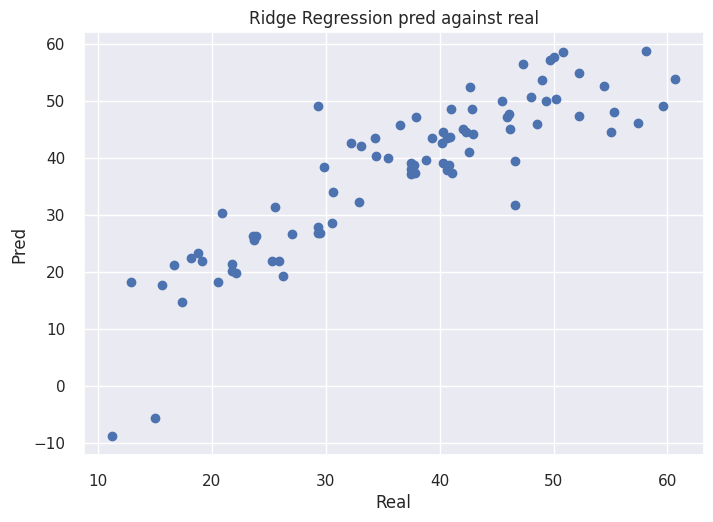

In [95]:
plt.scatter(y_test, pred_test_ridge)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('Ridge Regression pred against real')
plt.show()

## L1 REGULARIZATION - LASSO REGRESSION

In [96]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [97]:
pred_train_lasso = model_lasso.predict(X_train)
r2_train_lasso = r2_score(y_train, pred_train_lasso)
mse_train_lasso = mean_squared_error(y_train, pred_train_lasso)
rmse_train_lasso = np.sqrt(mse_train)
mae_train_lasso = mean_absolute_error(y_train, pred_train_lasso)

In [98]:
pred_val_lasso = model_lasso.predict(X_val)
r2_val_lasso = r2_score(y_val, pred_val_lasso)
mse_val_lasso = mean_squared_error(y_val, pred_val_lasso)
rmse_val_lasso = np.sqrt(mse_val)
mae_val_lasso = mean_absolute_error(y_val, pred_val_lasso)

In [99]:
pd.DataFrame({'Validation': [r2_val_lasso, mse_val_lasso,
                             rmse_val_lasso, mae_val_lasso],
              'Training': [r2_train_lasso, mse_train_lasso,
                           rmse_train_lasso, mae_train_lasso],},
             index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation   Training
R2      0.665099   0.682310
MSE    55.111445  64.479582
RMSE    7.575457   8.043392
MAE     5.781258   5.168930

In [100]:
model_lasso_cv = LassoCV(eps=0.01, n_alphas=100, cv=10, max_iter=10000)

In [101]:
model_lasso_cv.fit(X_train, y_train)
print("alpha:", model_lasso_cv.alpha_)

alpha: 0.2802894491791316


In [102]:
pred_val_lasso2 = model_lasso_cv.predict(X_val)
r2_val2_lasso = r2_score(y_val, pred_val_lasso2)
mse_val2_lasso = mean_squared_error(y_val, pred_val_lasso2)
rmse_val2_lasso = np.sqrt(mse_val)
mae_val2_lasso = mean_absolute_error(y_val, pred_val_lasso2)

In [103]:
pd.DataFrame({'Validation 1': [r2_val_lasso, mse_val_lasso,
                               rmse_val_lasso, mae_val_lasso],
              'Validation 2': [r2_val2_lasso, mse_val2_lasso,
                               rmse_val2_lasso, mae_val2_lasso],},
             index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation 1  Validation 2
R2        0.665099      0.671984
MSE      55.111445     53.978508
RMSE      7.575457      7.575457
MAE       5.781258      5.655513

In [104]:
model_lasso_cv.coef_

array([ 1.80539585, -3.63461583, -9.09608127,  1.67061821,  2.84594846,
        0.        ,  0.23943604,  0.3322006 , -0.064054  , -0.10440179,
        0.        ,  0.        ,  2.38273939,  0.        , -0.        ,
       -0.24377246, -0.41554706,  1.07731803, -1.48400153, -2.74276779,
        0.        ,  0.38046643, -1.99299675,  0.        ,  0.        ,
        0.        , -1.31204   ])

In [105]:
pred_test_lasso = model_lasso_cv.predict(X_test)
r2_test_lasso = r2_score(y_test, pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test, pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_val)
mae_test_lasso = mean_absolute_error(y_test, pred_test_lasso)
print('R2 Score:', r2_test_lasso)
print('MSE:', mse_test_lasso)
print('RMSE:', rmse_test_lasso)
print('MAE:', mae_test_lasso)

R2 Score: 0.7979756913498819
MSE: 29.95121549225314
RMSE: 7.575457210114056
MAE: 4.283511411932863


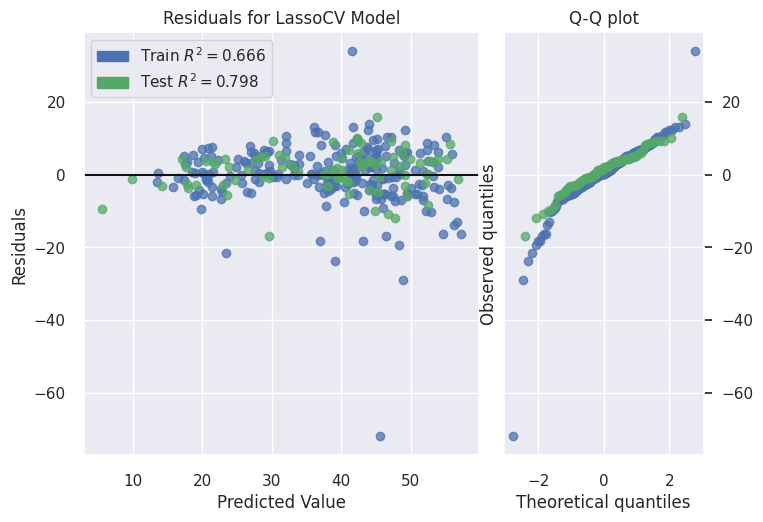

In [106]:
visualizer = ResidualsPlot(model_lasso_cv, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [107]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':pred_test_poly,
              'Residuals':(y_test-pred_test_lasso)}).head(5)

Y_Test     Y_Pred  Residuals
191    37.8  37.341252  -0.088523
343    46.6  39.391972   5.451134
275    49.7  57.133414  -4.197747
234    23.9  26.269558  -5.186119
208    26.2  19.293695   1.460912

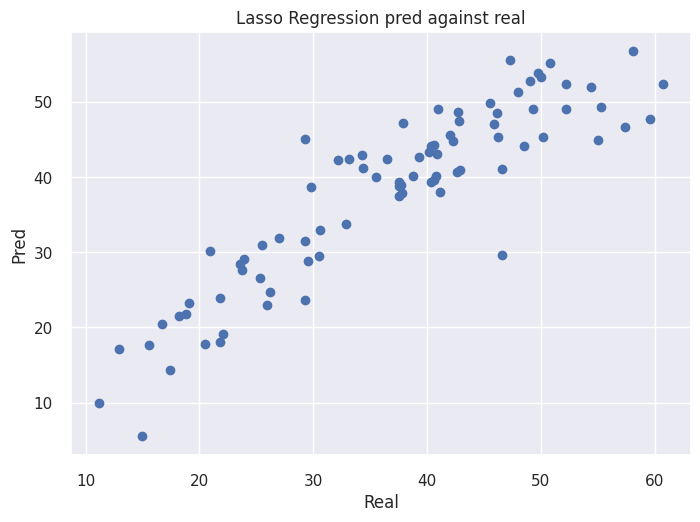

In [108]:
plt.scatter(y_test, pred_test_lasso)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('Lasso Regression pred against real')
plt.show()

## R2 SCORE OF THE MODELS

<ipython-input-109-4a4cb456f70a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = models, y = r2, palette='pastel')


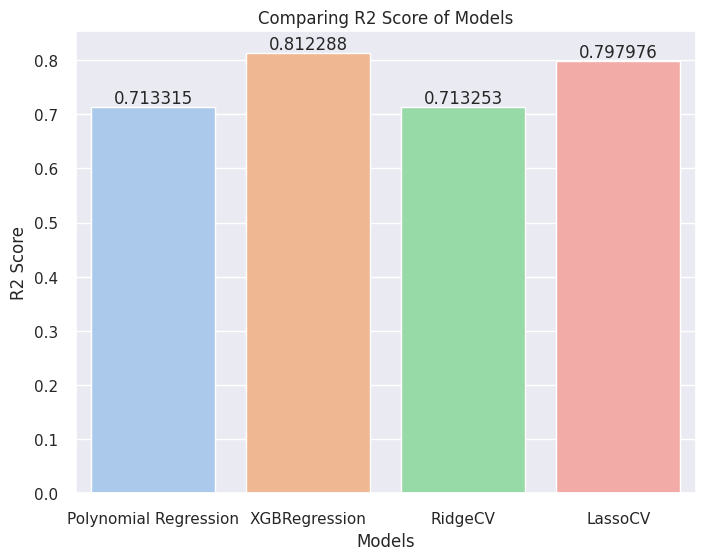

In [109]:
sns.set()
plt.figure(figsize=(8,6))

models = ['Polynomial Regression', 'XGBRegression', 'RidgeCV', 'LassoCV']
r2 = [r2_test_poly, r2_test_xgbr, r2_test_ridge, r2_test_lasso]
ax = sns.barplot(x = models, y = r2, palette='pastel')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparing R2 Score of Models');
plt.show()


## RMSE OF THE MODELS

<ipython-input-110-053426edbe85>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = models, y = rmse, palette = 'pastel')


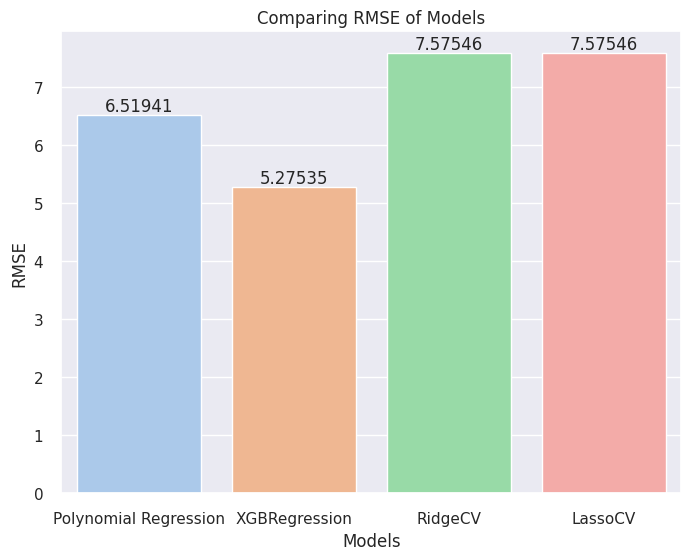

In [110]:
sns.set()
plt.figure(figsize=(8,6))
rmse = [rmse_test_poly, rmse_test_xgbr, rmse_test_ridge, rmse_test_lasso]
ax = sns.barplot(x = models, y = rmse, palette = 'pastel')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparing RMSE of Models');